In [1]:
# find cells significantly modulated by compensatory dHead movements

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dEye_or_dHead = 'dHead'
gaze_or_comp = 'comp'

In [7]:
pickle_path = '/home/niell_lab/data/freely_moving_ephys/batch_files/120221_hffm/pooled_ephys_population_update_120621.pickle'

In [8]:
df = pd.read_pickle(pickle_path)

In [9]:
if dEye_or_dHead=='dHead' and gaze_or_comp=='comp':
    left_name = 'fm1_downsacc_avg_comp_dHead'
    right_name = 'fm1_upsacc_avg_comp_dHead'
elif dEye_or_dHead=='dHead' and gaze_or_comp=='gaze':
    left_name = 'fm1_downsacc_avg_gaze_shift_dHead'
    right_name = 'fm1_upsacc_avg_gaze_shift_dHead'
elif dEye_or_dHead=='dEye' and gaze_or_comp=='comp':
    left_name = 'fm1_downsacc_avg_comp_dEye'
    right_name = 'fm1_upsacc_avg_comp_dEye'
elif dEye_or_dHead=='dEye' and gaze_or_comp=='gaze':
    left_name = 'fm1_downsacc_avg_gaze_shift_dEye'
    right_name = 'fm1_upsacc_avg_gaze_shift_dEye'

In [10]:
def z_score(a):
    return (np.max(np.abs(a))-np.mean(a)) / np.std(a)

In [14]:
def norm_z_score(a):
    norm = (a-np.nanmean(a)) / np.nanmax(np.abs(a))
    baseline = np.nanmean(norm[:30])
    z = z_score(norm[38:50] - baseline)
    return z

In [19]:
peak_rangestart = 38
peak_range_stop = 50
for ind, row in df.iterrows():
    # choose best direction (left vs right)
    left_deflection = row[left_name]
    right_deflection = row[right_name]
    # prefered direction
    left_right_index = np.argmax(np.abs([z_score(left_deflection), z_score(right_deflection)])) # 0 = left pref; 1 = right pref
    # norm modulation at each direction
    df.at[ind, dEye_or_dHead+'_'+gaze_or_comp+'_left_modulation'] = norm_z_score(left_deflection)
    df.at[ind, dEye_or_dHead+'_'+gaze_or_comp+'_right_modulation'] = norm_z_score(right_deflection)
    df.at[ind, dEye_or_dHead+'_'+gaze_or_comp+'_direction_pref'] = ['left','right'][left_right_index]

In [25]:
df[dEye_or_dHead+'_'+gaze_or_comp+'_left_modulation']

0      1.960219
1      1.175949
2      1.907227
3      1.109654
4      1.708719
         ...   
660    1.999438
661    2.687376
662    1.624001
663    3.177487
664    1.813359
Name: dHead_comp_left_modulation, Length: 665, dtype: float64

In [26]:
df[dEye_or_dHead+'_'+gaze_or_comp+'_right_modulation']

0      3.055658
1      2.077669
2      1.752717
3      1.622855
4      1.833487
         ...   
660    3.913972
661    2.237844
662    1.552640
663    2.807574
664    1.727505
Name: dHead_comp_right_modulation, Length: 665, dtype: float64

In [27]:
df[dEye_or_dHead+'_'+gaze_or_comp+'_direction_pref']

0       left
1      right
2      right
3      right
4       left
       ...  
660    right
661     left
662    right
663    right
664    right
Name: dHead_comp_direction_pref, Length: 665, dtype: object

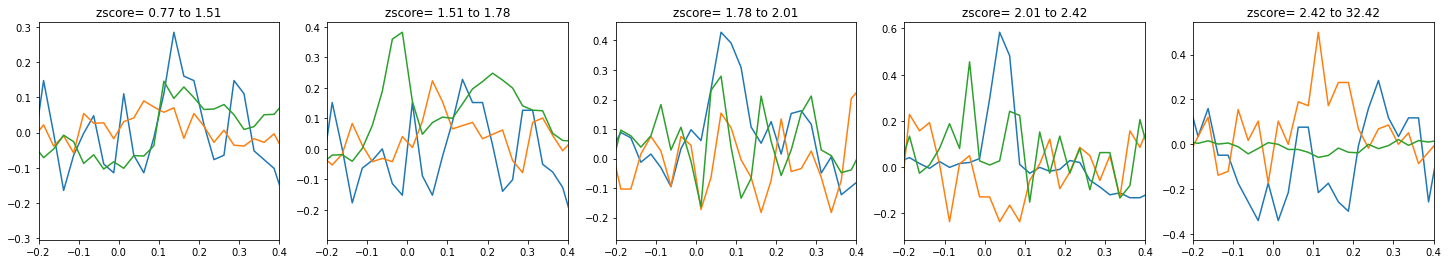

In [49]:
model_dt = 0.025
trange = np.arange(-1, 1.1, model_dt)
trange_x = 0.5*(trange[0:-1]+ trange[1:])
out, bins = pd.qcut(df[dEye_or_dHead+'_'+gaze_or_comp+'_left_modulation'], 5, labels=range(5), retbins=True)
plt.subplots(1,5,figsize=(25,4))
for b in range(5):
    group = df[out==b]
    plt.subplot(1,5,b+1)
    for ind, row in group.iterrows():
        plt.plot(trange_x, row['norm_deflection_at_opp_direction_comp'])
    plt.title('zscore= '+str(np.round(bins[b],2))+' to '+str(np.round(bins[b+1],2)))
    plt.xlim([-0.2,0.4])